In [884]:
!pip install geopandas matplotlib mapclassify

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [1006]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import pickle
import json
import datetime

from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [886]:
with open(os.path.join('data', 'graph_datasets','node_to_codes_all_data_dynamic.json'),'r') as f:
    code_to_node= json.load(f)

### Load results from files generated in notebook of evaluation

In [887]:
"""
all_results_by_k= []
results_by_ma= []
max_snapshots = 40

for gnn_type in tqdm_notebook(['regular', 'tour_infras_totals','tour_infras_totals_twt'], desc='GNN type...'):
    for trip_type in tqdm_notebook(['low', 'med', 'high'], desc='Edge type...', leave=False):
        for T_ in tqdm_notebook([1,2,4,7,14,21], desc='Time horizon (days)', leave=False):
            try:
                try:
                    df= pd.read_csv(os.path.join('results', f'eval_results_{gnn_type}_{trip_type}_{T_}.csv'), index_col=0)
                except:
                    df= pd.read_csv(os.path.join('results', f'eval_results_{gnn_type}_{trip_type}_{T_}_{max_snapshots}.csv'), index_col=0)
                #print(df)
                
                for k in tqdm_notebook([1,3,5,10,15], desc='k', leave=False):
                    results_by_origin= df.groupby(['origin'])['dest','score', 'true_label', 'label_hat'].apply(lambda x: x.nlargest(k, columns=['score']))
                    #print(results_by_origin.reset_index())
                    #global results

                    report= classification_report(y_true=results_by_origin['true_label'], y_pred=results_by_origin['label_hat'], output_dict=True)
                    avg = report['weighted avg']
                    avg['gnn_type']=  gnn_type
                    avg['trip_type']= trip_type
                    avg['time_horizon']= T_
                    avg['k']=k
                    all_results_by_k.append(avg)

                #results by origin MA
                results_by_origin_reset=results_by_origin.reset_index()
                for o in tqdm_notebook(results_by_origin_reset['origin'].unique(), desc='Origin MA...', leave=False):
                    o_df = results_by_origin_reset[results_by_origin_reset['origin']==o]
                    report= classification_report(y_true=o_df['true_label'], y_pred=o_df['label_hat'], output_dict=True)
                    avg = report['weighted avg']
                    avg['gnn_type']=  gnn_type
                    avg['trip_type']= trip_type
                    avg['time_horizon']= T_
                    avg['origin_ma']=code_to_node[str(int(o))]
                    results_by_ma.append(avg)
            except:
                print(f"No results for {gnn_type}, {trip_type}, {T_}")
all_results_df = pd.DataFrame(all_results_by_k)
all_results_df.to_csv(os.path.join('results', 'all_results.csv'))

all_results_by_ma_df = pd.DataFrame(results_by_ma)
all_results_by_ma_df.to_csv(os.path.join('results', 'all_results_by_ma.csv'))

all_results_df.head()
"""

'\nall_results_by_k= []\nresults_by_ma= []\nmax_snapshots = 40\n\nfor gnn_type in tqdm_notebook([\'regular\', \'tour_infras_totals\',\'tour_infras_totals_twt\'], desc=\'GNN type...\'):\n    for trip_type in tqdm_notebook([\'low\', \'med\', \'high\'], desc=\'Edge type...\', leave=False):\n        for T_ in tqdm_notebook([1,2,4,7,14,21], desc=\'Time horizon (days)\', leave=False):\n            try:\n                try:\n                    df= pd.read_csv(os.path.join(\'results\', f\'eval_results_{gnn_type}_{trip_type}_{T_}.csv\'), index_col=0)\n                except:\n                    df= pd.read_csv(os.path.join(\'results\', f\'eval_results_{gnn_type}_{trip_type}_{T_}_{max_snapshots}.csv\'), index_col=0)\n                #print(df)\n                \n                for k in tqdm_notebook([1,3,5,10,15], desc=\'k\', leave=False):\n                    results_by_origin= df.groupby([\'origin\'])[\'dest\',\'score\', \'true_label\', \'label_hat\'].apply(lambda x: x.nlargest(k, columns=

In [888]:
all_results_df= pd.read_csv(os.path.join('results', 'all_results.csv'), index_col=0)
all_results_df.head()

,precision,recall,f1-score,support,gnn_type,trip_type,time_horizon,k
0,0.541070,0.735575,0.623505,2201,regular,low,1,1
1,0.536402,0.732394,0.619260,6603,regular,low,1,3
2,0.515969,0.718310,0.600554,11005,regular,low,1,5
3,0.480694,0.693321,0.567753,22010,regular,low,1,10
4,0.455252,0.674724,0.543674,33015,regular,low,1,15


In [889]:
all_results_by_ma_df= pd.read_csv(os.path.join('results', 'all_results_by_ma.csv'), index_col=0)
all_results_by_ma_df.head()

,precision,recall,f1-score,support,gnn_type,trip_type,time_horizon,origin_ma
0,0.751111,0.866667,0.804762,15.0,regular,low,1,01001_AM
1,0.111111,0.333333,0.166667,15.0,regular,low,1,01002
2,0.284444,0.533333,0.371014,15.0,regular,low,1,01010_AM
3,0.537778,0.733333,0.620513,15.0,regular,low,1,01031_AM
4,0.444444,0.666667,0.533333,15.0,regular,low,1,01036


### Results by MA

In [890]:
all_results_by_ma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118854 entries, 0 to 118853
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   precision     118854 non-null  float64
 1   recall        118854 non-null  float64
 2   f1-score      118854 non-null  float64
 3   support       118854 non-null  float64
 4   gnn_type      118854 non-null  object 
 5   trip_type     118854 non-null  object 
 6   time_horizon  118854 non-null  int64  
 7   origin_ma     118854 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 8.2+ MB


In [891]:
all_results_by_ma_df['origin_ma'].nunique()

2201

In [892]:
census_zones_gdf = gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')
census_zones_gdf['infrastructura-total']= census_zones_gdf['Viv-total'] + census_zones_gdf['hotels-total'] +census_zones_gdf['camps-total']
census_zones_gdf['infrastructura-per-area']= census_zones_gdf['Viv-per-area'] + census_zones_gdf['hotels-per-area'] +census_zones_gdf['camps-per-area']
census_zones_gdf['infrastructura-total-label']= pd.cut(census_zones_gdf['infrastructura-total'], bins=3, labels='L M H'.split())
census_zones_gdf['infrastructura-per-area-label']= pd.qcut(census_zones_gdf['infrastructura-per-area'], 3, labels='L M H'.split())

In [893]:
census_zones_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry,infrastructura-total,infrastructura-per-area,infrastructura-total-label,infrastructura-per-area-label
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803...",22.0,0.061245,L,L
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42...",10.0,0.103790,L,M
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362...",17.0,0.085936,L,M
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42...",69.0,0.185477,L,M
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658...",6.0,0.159749,L,M


In [1029]:
census_zones_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   primary_key                    2208 non-null   object  
 1   area_km2                       2208 non-null   float64 
 2   Viv-total                      2208 non-null   float64 
 3   hotels-total                   2208 non-null   float64 
 4   camps-total                    2208 non-null   float64 
 5   POB20                          2208 non-null   int64   
 6   HOMBRES                        2208 non-null   int64   
 7   MUJERES                        2208 non-null   int64   
 8   Viv-per-area                   2208 non-null   float64 
 9   hotels-per-area                2208 non-null   float64 
 10  camps-per-area                 2208 non-null   float64 
 11  geometry                       2208 non-null   geometry
 12  infrastructura-total      

In [894]:
def plot_result_map(target_gnn, target_trip_type, target_time_horizon='all'):
    
    target_result= None
    
    if target_time_horizon!='all':
        target_result = all_results_by_ma_df[(all_results_by_ma_df['gnn_type']==target_gnn) &
                                            (all_results_by_ma_df['trip_type']==target_trip_type) &
                                            (all_results_by_ma_df['time_horizon']==target_time_horizon)]
    else:
        target_result = all_results_by_ma_df[(all_results_by_ma_df['gnn_type']==target_gnn) &
                                            (all_results_by_ma_df['trip_type']==target_trip_type)]
    
    results_map = census_zones_gdf.merge(target_result, left_on='primary_key', right_on='origin_ma')
    
    ax=census_zones_gdf.boundary.plot(figsize=(20,20),linewidth=0.5);
    results_map.plot('f1-score',ax=ax, scheme='quantiles', legend=True, k=3);
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join('results', 'figs', f'result_map_{target_gnn}_{target_trip_type}_{target_time_horizon}.png'))
    return results_map

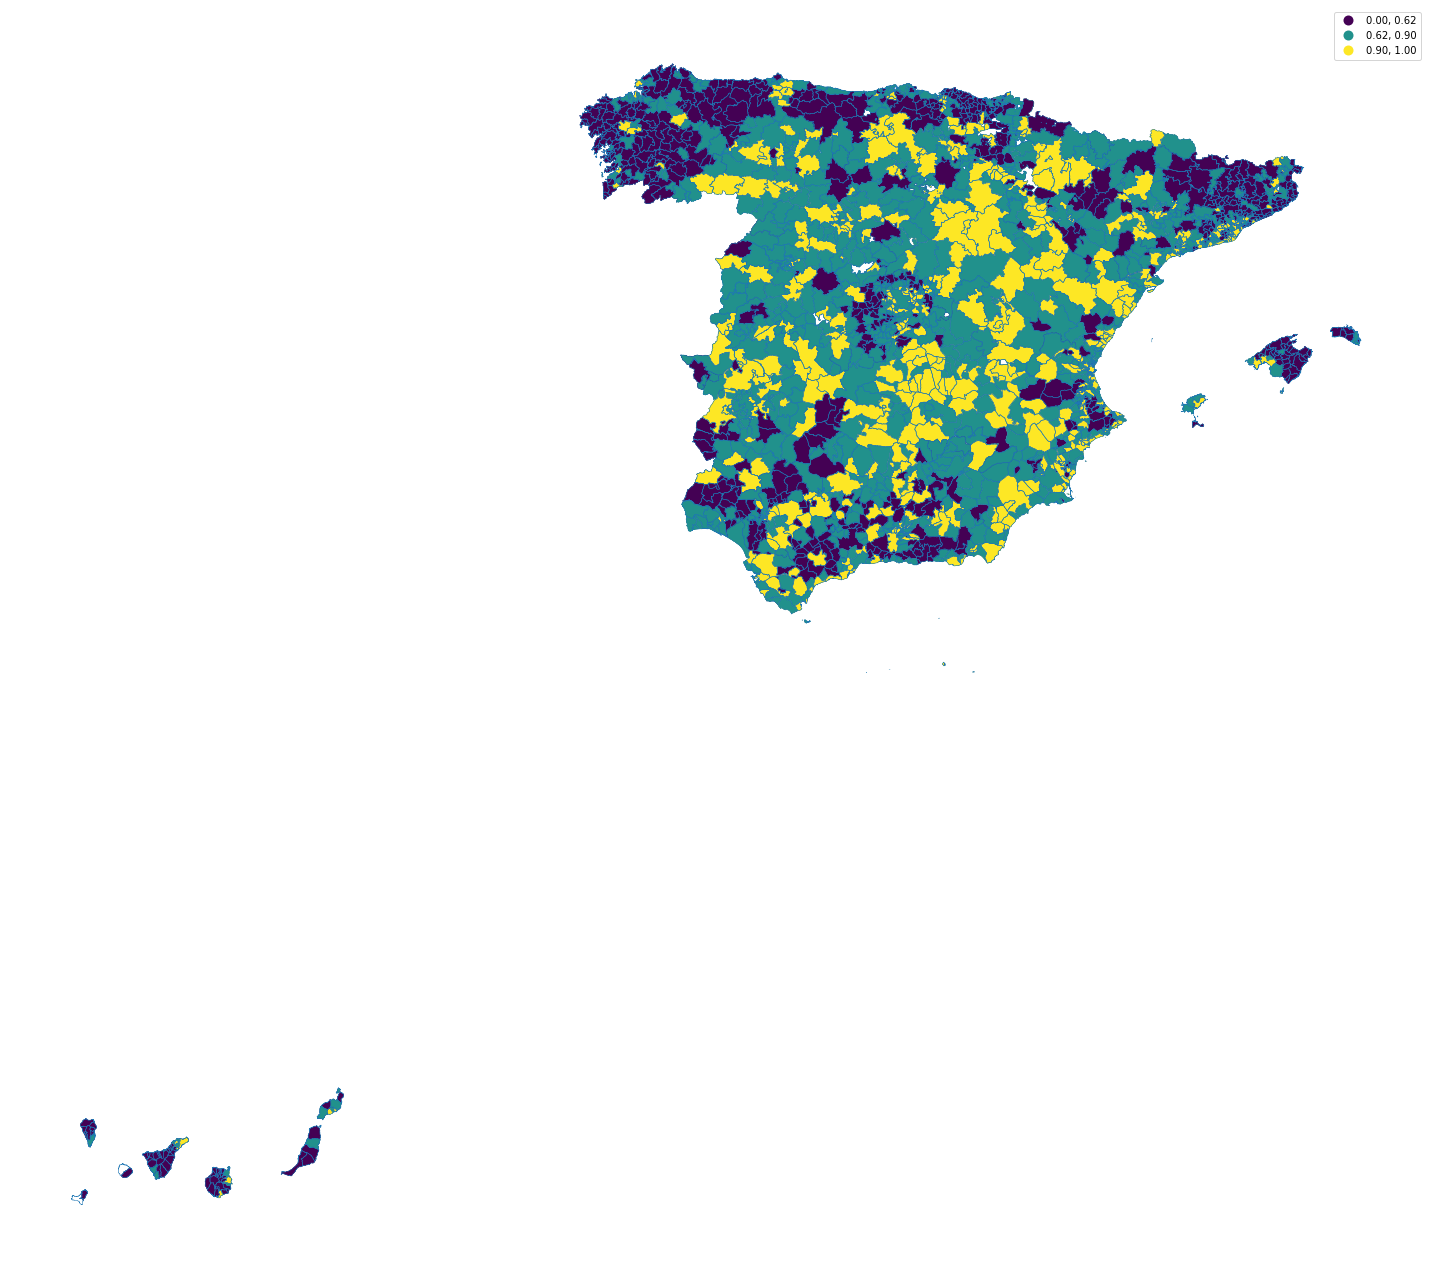

In [895]:
result_map= plot_result_map('tour_infras_totals_twt', 'med')

In [896]:
result_map.corr().round(3)

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,infrastructura-total,infrastructura-per-area,precision,recall,f1-score,support,time_horizon
area_km2,1.000,-0.047,0.203,0.215,0.004,0.005,0.004,-0.180,-0.157,-0.095,-0.020,-0.185,0.174,0.166,0.172,NaN,0.000
Viv-total,-0.047,1.000,0.149,0.242,0.118,0.121,0.115,0.550,0.174,0.174,0.993,0.550,-0.006,-0.016,-0.011,NaN,0.000
hotels-total,0.203,0.149,1.000,0.191,0.825,0.823,0.826,0.008,0.488,0.022,0.266,0.030,0.112,0.104,0.109,NaN,0.000
camps-total,0.215,0.242,0.191,1.000,0.034,0.035,0.033,0.109,0.085,0.503,0.265,0.114,0.064,0.065,0.065,NaN,-0.000
POB20,0.004,0.118,0.825,0.034,1.000,1.000,1.000,0.047,0.325,0.010,0.213,0.061,0.116,0.103,0.111,NaN,0.000
HOMBRES,0.005,0.121,0.823,0.035,1.000,1.000,0.999,0.048,0.327,0.011,0.216,0.062,0.119,0.106,0.114,NaN,0.000
MUJERES,0.004,0.115,0.826,0.033,1.000,0.999,1.000,0.046,0.324,0.010,0.210,0.060,0.114,0.101,0.109,NaN,0.000
Viv-per-area,-0.180,0.550,0.008,0.109,0.047,0.048,0.046,1.000,0.298,0.332,0.538,0.999,-0.024,-0.026,-0.025,NaN,0.000
hotels-per-area,-0.157,0.174,0.488,0.085,0.325,0.327,0.324,0.298,1.000,0.208,0.228,0.339,0.052,0.049,0.051,NaN,0.000
camps-per-area,-0.095,0.174,0.022,0.503,0.010,0.011,0.010,0.332,0.208,1.000,0.175,0.342,-0.030,-0.034,-0.031,NaN,0.000


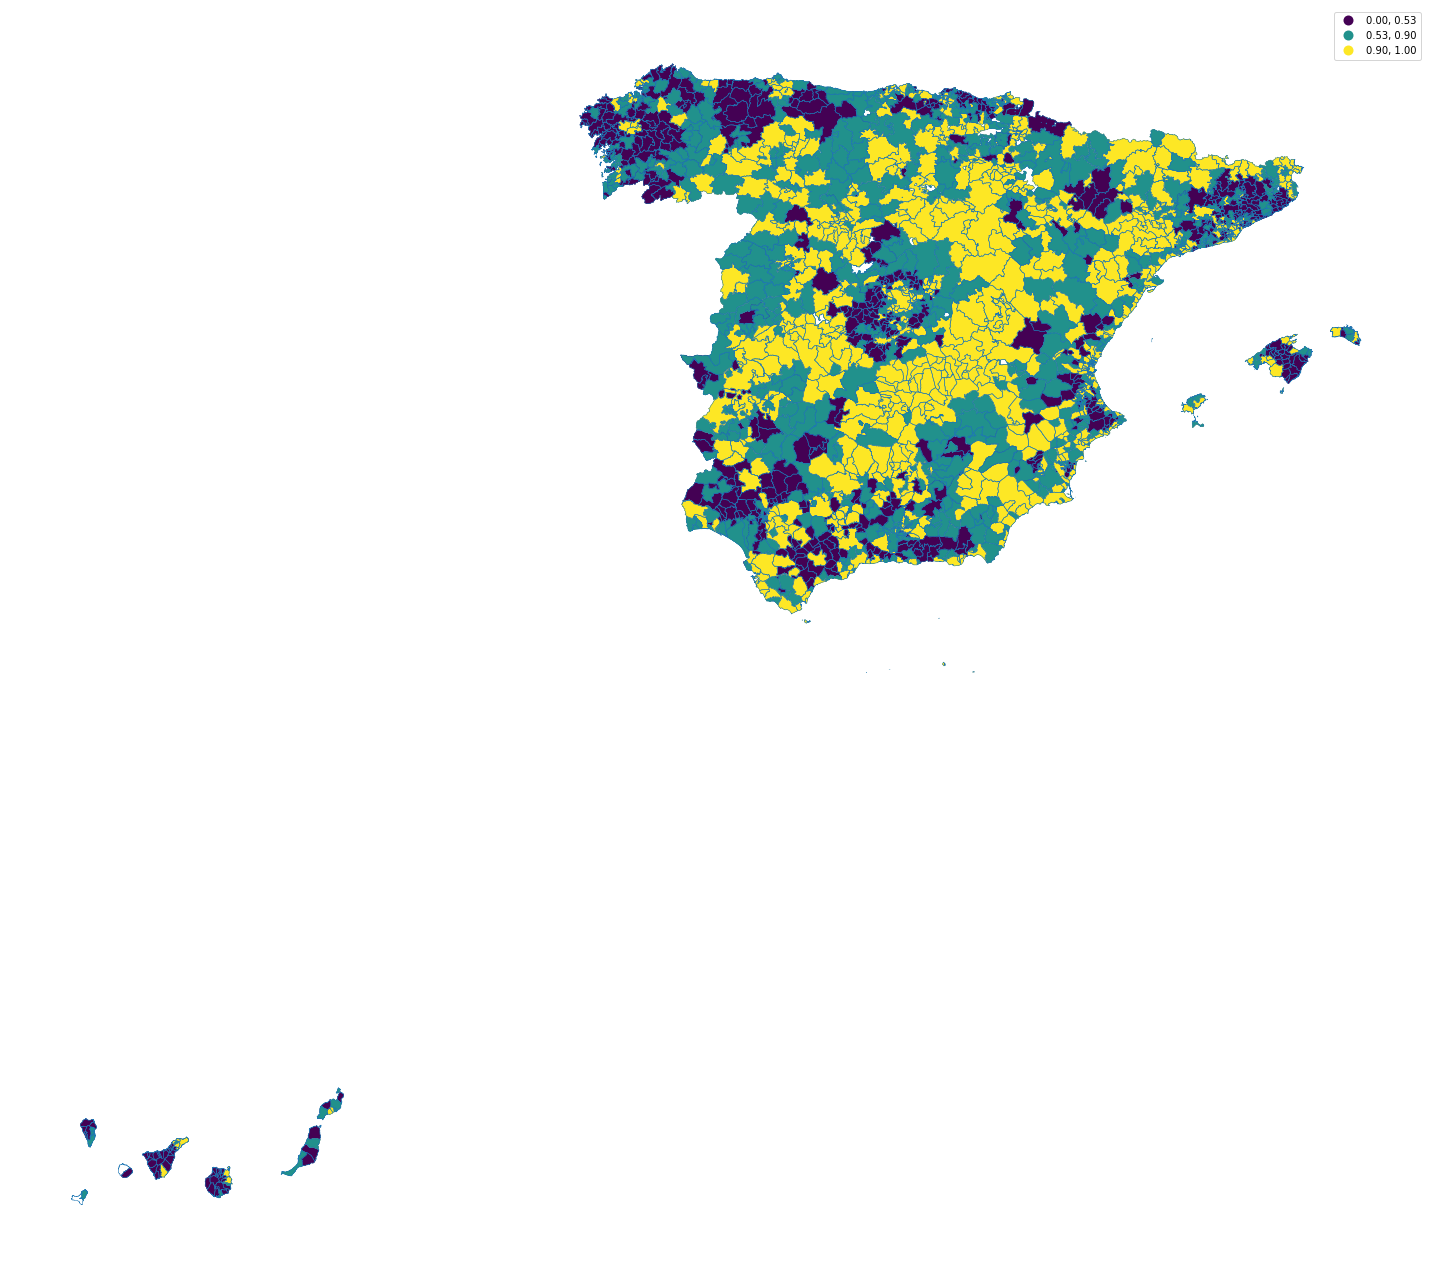

In [897]:
result_map= plot_result_map('tour_infras_totals_twt', 'high')

In [898]:
result_map.corr().round(3)

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,infrastructura-total,infrastructura-per-area,precision,recall,f1-score,support,time_horizon
area_km2,1.000,-0.047,0.203,0.215,0.004,0.005,0.004,-0.180,-0.157,-0.095,-0.020,-0.185,0.203,0.199,0.203,NaN,0.000
Viv-total,-0.047,1.000,0.149,0.242,0.118,0.121,0.115,0.550,0.174,0.174,0.993,0.550,0.016,-0.006,0.007,NaN,0.000
hotels-total,0.203,0.149,1.000,0.191,0.825,0.823,0.826,0.008,0.488,0.022,0.266,0.030,0.146,0.133,0.141,NaN,0.000
camps-total,0.215,0.242,0.191,1.000,0.034,0.035,0.033,0.109,0.085,0.503,0.265,0.114,0.093,0.088,0.090,NaN,-0.000
POB20,0.004,0.118,0.825,0.034,1.000,1.000,1.000,0.047,0.325,0.010,0.213,0.061,0.126,0.111,0.119,NaN,0.000
HOMBRES,0.005,0.121,0.823,0.035,1.000,1.000,0.999,0.048,0.327,0.011,0.216,0.062,0.129,0.113,0.122,NaN,0.000
MUJERES,0.004,0.115,0.826,0.033,1.000,0.999,1.000,0.046,0.324,0.010,0.210,0.060,0.123,0.109,0.117,NaN,0.000
Viv-per-area,-0.180,0.550,0.008,0.109,0.047,0.048,0.046,1.000,0.298,0.332,0.538,0.999,-0.084,-0.089,-0.086,NaN,0.000
hotels-per-area,-0.157,0.174,0.488,0.085,0.325,0.327,0.324,0.298,1.000,0.208,0.228,0.339,0.060,0.050,0.056,NaN,0.000
camps-per-area,-0.095,0.174,0.022,0.503,0.010,0.011,0.010,0.332,0.208,1.000,0.175,0.342,-0.048,-0.046,-0.049,NaN,0.000


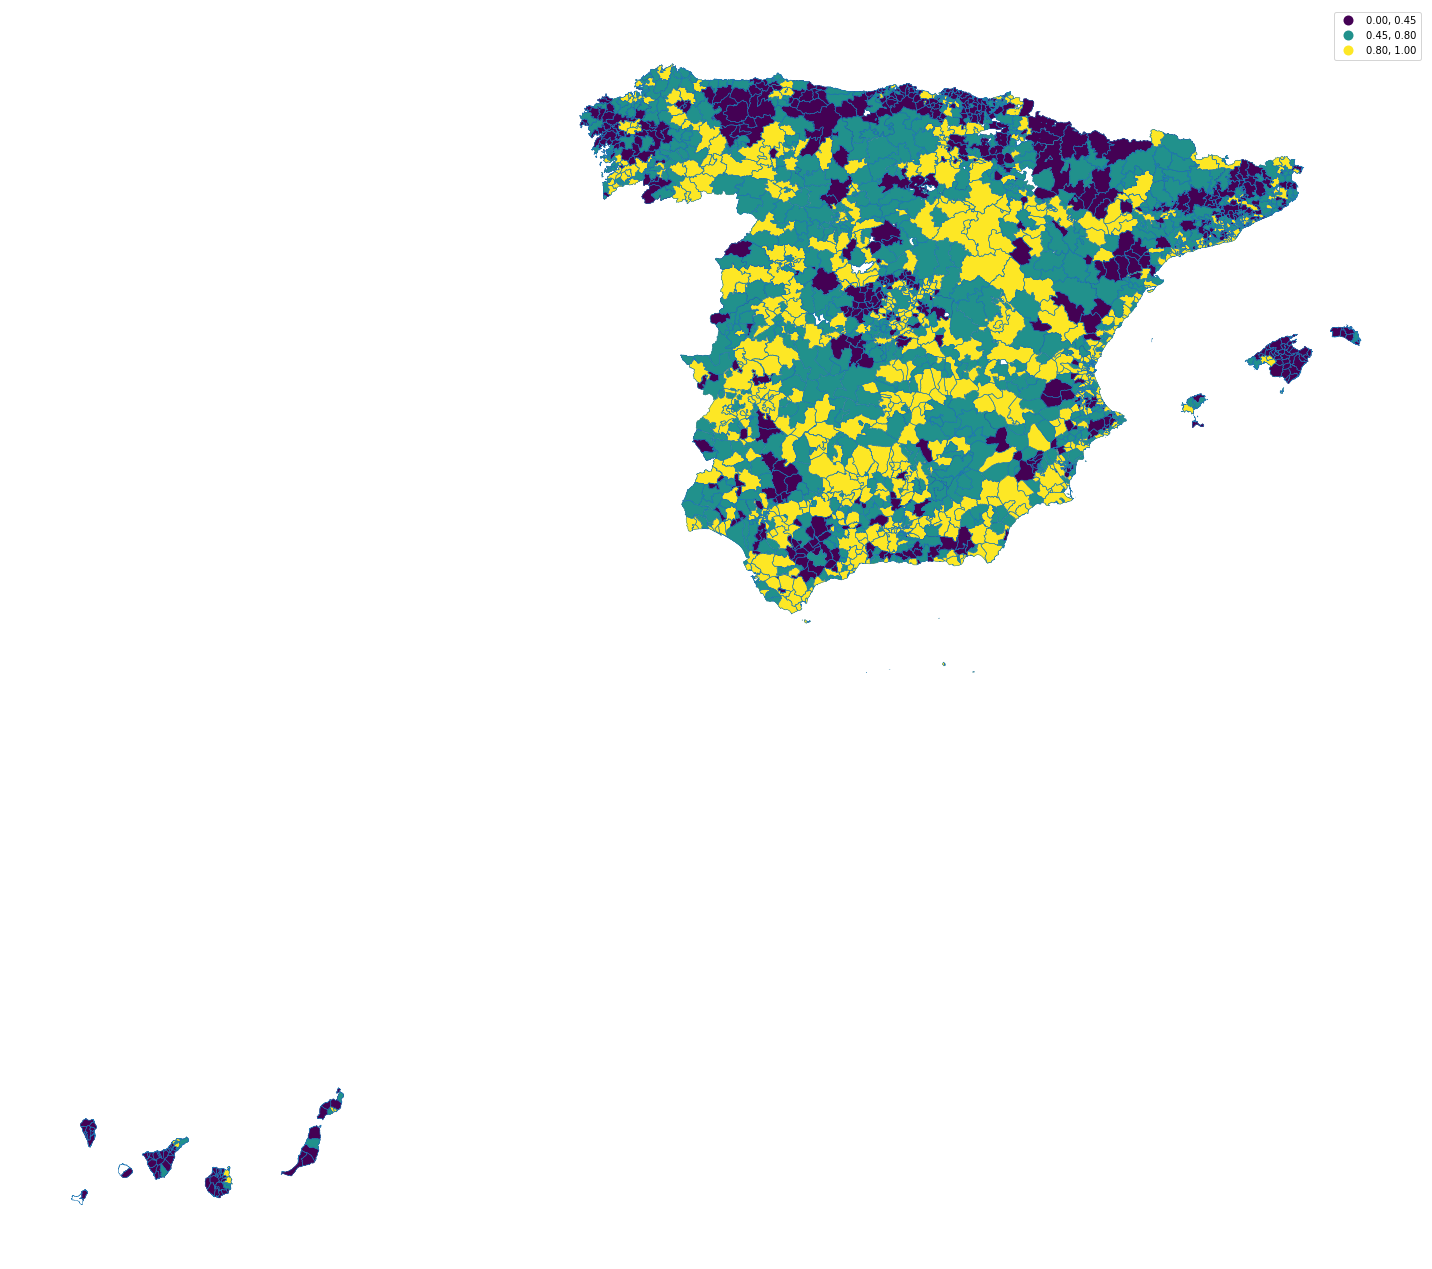

In [899]:
result_map=plot_result_map('tour_infras_totals_twt', 'low')

In [900]:
result_map.corr().round(3)

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,infrastructura-total,infrastructura-per-area,precision,recall,f1-score,support,time_horizon
area_km2,1.000,-0.047,0.203,0.215,0.004,0.005,0.004,-0.180,-0.157,-0.095,-0.020,-0.185,0.165,0.170,0.169,NaN,0.000
Viv-total,-0.047,1.000,0.149,0.242,0.118,0.121,0.115,0.550,0.174,0.174,0.993,0.550,-0.024,-0.041,-0.032,NaN,0.000
hotels-total,0.203,0.149,1.000,0.191,0.825,0.823,0.826,0.008,0.488,0.022,0.266,0.030,0.117,0.107,0.114,NaN,0.000
camps-total,0.215,0.242,0.191,1.000,0.034,0.035,0.033,0.109,0.085,0.503,0.265,0.114,0.052,0.060,0.056,NaN,-0.000
POB20,0.004,0.118,0.825,0.034,1.000,1.000,1.000,0.047,0.325,0.010,0.213,0.061,0.135,0.118,0.128,NaN,0.000
HOMBRES,0.005,0.121,0.823,0.035,1.000,1.000,0.999,0.048,0.327,0.011,0.216,0.062,0.138,0.120,0.131,NaN,0.000
MUJERES,0.004,0.115,0.826,0.033,1.000,0.999,1.000,0.046,0.324,0.010,0.210,0.060,0.132,0.115,0.126,NaN,0.000
Viv-per-area,-0.180,0.550,0.008,0.109,0.047,0.048,0.046,1.000,0.298,0.332,0.538,0.999,-0.053,-0.052,-0.053,NaN,0.000
hotels-per-area,-0.157,0.174,0.488,0.085,0.325,0.327,0.324,0.298,1.000,0.208,0.228,0.339,0.052,0.040,0.047,NaN,0.000
camps-per-area,-0.095,0.174,0.022,0.503,0.010,0.011,0.010,0.332,0.208,1.000,0.175,0.342,-0.025,-0.027,-0.025,NaN,0.000


### General results

In [901]:
all_results_df

,precision,recall,f1-score,support,gnn_type,trip_type,time_horizon,k
0,0.541070,0.735575,0.623505,2201,regular,low,1,1
1,0.536402,0.732394,0.619260,6603,regular,low,1,3
2,0.515969,0.718310,0.600554,11005,regular,low,1,5
3,0.480694,0.693321,0.567753,22010,regular,low,1,10
4,0.455252,0.674724,0.543674,33015,regular,low,1,15
...,...,...,...,...,...,...,...,...
265,0.735807,0.857792,0.792131,2201,tour_infras_totals_twt,high,21,1
266,0.693057,0.832500,0.756406,6603,tour_infras_totals_twt,high,21,3
267,0.671640,0.819537,0.738254,11005,tour_infras_totals_twt,high,21,5
268,0.616949,0.785461,0.691081,22010,tour_infras_totals_twt,high,21,10


In [902]:
all_results_df['k'].unique()

array([ 1,  3,  5, 10, 15])

In [903]:
all_results_df['time_horizon'].unique()

array([ 1,  2,  4,  7, 14, 21])

In [904]:
results_lite = all_results_df[(all_results_df['k'].isin([1,5,15])) & (all_results_df['time_horizon'].isin([7,14,21]))]

In [905]:
all_results_by_k= results_lite.groupby(['gnn_type', 'trip_type', 'k', 'time_horizon'])['f1-score'].mean().to_frame()
all_results_by_k.pivot_table(index='gnn_type trip_type'.split(), columns='k time_horizon'.split(), values='f1-score').round(3)

k                                    1                    5                 \
time_horizon                         7      14     21     7      14     21   
gnn_type               trip_type                                             
regular                high       0.743  0.697  0.768  0.688  0.689  0.730   
                       low        0.683  0.645  0.681  0.661  0.632  0.651   
                       med        0.770  0.673  0.834  0.714  0.633  0.764   
tour_infras_totals     high       0.784  0.762  0.787  0.731  0.708  0.724   
                       low        0.678  0.766  0.781  0.610  0.678  0.667   
                       med        0.827  0.865  0.882  0.756  0.780  0.805   
tour_infras_totals_twt high       0.787  0.766  0.792  0.738  0.737  0.738   
                       low        0.692  0.775  0.793  0.612  0.701  0.712   
                       med        0.812  0.837  0.863  0.762  0.747  0.770   

k                                    15                
time_horizon                         7      14     21  
gnn_type               trip_type                       
regular                high       0.575  0.613  0.639  
                       low        0.575  0.561  0.578  
                       med        0.640  0.576  0.649  
tour_infras_totals     high       0.643  0.627  0.594  
                       low        0.550  0.569  0.543  
                       med        0.610  0.636  0.684  
tour_infras_totals_twt high       0.648  0.655  0.655  
                       low        0.540  0.574  0.596  
                       med        0.639  0.624  0.621

In [906]:
all_results_by_k.pivot_table(index='gnn_type trip_type'.split(), columns='k time_horizon'.split(), values='f1-score').mean(axis=1).round(3)

gnn_type                trip_type
regular                 high         0.683
                        low          0.630
                        med          0.695
tour_infras_totals      high         0.707
                        low          0.649
                        med          0.761
tour_infras_totals_twt  high         0.724
                        low          0.666
                        med          0.742
dtype: float64

In [907]:
f1_score_df= all_results_df[all_results_df['k']==3].groupby(['gnn_type', 'trip_type', 'time_horizon'])['f1-score'].mean().to_frame()
f1_score_df= f1_score_df.reset_index()
f1_score_df

,gnn_type,trip_type,time_horizon,f1-score
0,regular,high,1,0.715219
1,regular,high,2,0.761941
2,regular,high,4,0.741131
3,regular,high,7,0.720256
4,regular,high,14,0.700368
5,regular,high,21,0.749395
6,regular,low,1,0.619260
7,regular,low,2,0.678762
8,regular,low,4,0.611397
9,regular,low,7,0.683028


In [908]:
piv_f1_score_df = f1_score_df.pivot_table(index='gnn_type trip_type'.split(), columns='time_horizon', values='f1-score')
piv_f1_score_df

time_horizon                            1         2         4         7   \
gnn_type               trip_type                                           
regular                high       0.715219  0.761941  0.741131  0.720256   
                       low        0.619260  0.678762  0.611397  0.683028   
                       med        0.832825  0.729304  0.807009  0.734789   
tour_infras_totals     high       0.746850  0.754705  0.754492  0.754705   
                       low        0.760663  0.714170  0.745578  0.638730   
                       med        0.806360  0.757044  0.777963  0.789120   
tour_infras_totals_twt high       0.751093  0.750032  0.760024  0.760663   
                       low        0.572888  0.543051  0.558896  0.642806   
                       med        0.827385  0.824777  0.840455  0.789980   

time_horizon                            14        21  
gnn_type               trip_type                      
regular                high       0.700368  0.749395  
                       low        0.651389  0.661028  
                       med        0.652617  0.800532  
tour_infras_totals     high       0.738170  0.759811  
                       low        0.723409  0.713541  
                       med        0.826733  0.843075  
tour_infras_totals_twt high       0.754280  0.756406  
                       low        0.739227  0.751305  
                       med        0.788905  0.816965

## Use case results analysis (for Benidorm TA - 03031)

In [909]:
tour_flows= pd.read_csv(os.path.join('data','mobility','agg_flows_with.csv'), index_col=0, parse_dates=['timestamp'])
use_case_results_df = tour_flows.set_index('index')
tour_flows.head()

,index,origen,destino,viajes,timestamp,origin_dest
0,0,01001_AM,06060_AM,3.841,2020-04-01,01001_AM_06060_AM
1,1,01001_AM,09056,10.800,2020-04-01,01001_AM_09056
2,2,01001_AM,09059,27.477,2020-04-01,01001_AM_09059
3,3,01001_AM,09194_AM,38.666,2020-04-01,01001_AM_09194_AM
4,4,01001_AM,09439_AM,10.795,2020-04-01,01001_AM_09439_AM


In [910]:
use_case_results_lst= []
for trip_type in 'low med high'.split():
    df = pd.read_csv(os.path.join('results',f'use_case_results_tour_infras_totals_twt_{trip_type}_14_40.csv'),  parse_dates=['date'], index_col=0)
    df['trip_type']= trip_type
    use_case_results_lst.append(df)

use_case_results_df = pd.concat(use_case_results_lst, axis=0)    
use_case_results_df.head()

,score,origin,dest,true_label,label_hat,date,trip_type
0,0.643759,0.0,375.0,1.0,1.0,2021-02-12,low
1,0.611893,0.0,782.0,1.0,1.0,2021-02-12,low
2,0.472560,0.0,865.0,1.0,0.0,2021-02-12,low
3,0.726801,0.0,1059.0,1.0,1.0,2021-02-12,low
4,0.640724,0.0,1079.0,1.0,1.0,2021-02-12,low


In [911]:
dates= use_case_results_df['date'].unique()

In [1009]:
len(dates)

41

In [912]:
target_flows= tour_flows[(tour_flows['timestamp'].isin(dates)) & (tour_flows['destino']=='03031')]
target_flows

,index,origen,destino,viajes,timestamp,origin_dest
16127064,16127064,02003,03031,8.471,2021-02-12,02003_03031
16129174,16129174,04031_AM,03031,7.259,2021-02-12,04031_AM_03031
16132798,16132798,08159,03031,8.100,2021-02-12,08159_03031
16137378,16137378,12084,03031,8.855,2021-02-12,12084_03031
16150796,16150796,28079,03031,17.983,2021-02-12,28079_03031
...,...,...,...,...,...,...
17729227,17729227,46021,03031,7.929,2021-03-24,46021_03031
17730243,17730243,46159,03031,16.959,2021-03-24,46159_03031
17730997,17730997,46214_AM,03031,17.955,2021-03-24,46214_AM_03031
17731491,17731491,46244,03031,13.693,2021-03-24,46244_03031


In [944]:
for i,j in code_to_node.items():
    if j == '03031':
        print("The node code is",i)
        break

The node code is 45


In [945]:
target_results= use_case_results_df[use_case_results_df['dest']==45]

In [946]:
target_results['origin_MA']= target_results['origin'].apply(lambda x: code_to_node[str(int(x))])
target_results['dest_MA']= target_results['dest'].apply(lambda x: code_to_node[str(int(x))])

In [947]:
target_results

,score,origin,dest,true_label,label_hat,date,trip_type,origin_MA,dest_MA
7521,0.942991,1094.0,45.0,1.0,1.0,2021-02-12,low,28079,03031
8900,0.759134,1199.0,45.0,1.0,1.0,2021-02-12,low,3002701,03031
9048,0.683173,1206.0,45.0,1.0,1.0,2021-02-12,low,30037,03031
11069,0.499471,1598.0,45.0,1.0,0.0,2021-02-12,low,43019_AM,03031
12405,0.409907,1755.0,45.0,1.0,0.0,2021-02-12,low,46074_AM,03031
...,...,...,...,...,...,...,...,...,...
28936,0.539617,756.0,45.0,0.0,1.0,2021-03-24,high,18158,03031
29947,0.539393,1033.0,45.0,0.0,1.0,2021-03-24,high,27014_AM,03031
32866,0.539563,620.0,45.0,0.0,1.0,2021-03-24,high,15074_AM,03031
34324,0.541761,1229.0,45.0,0.0,1.0,2021-03-24,high,31084_AM,03031


In [1010]:
T=14
for d in dates:
    target_d = d+np.timedelta64(14,'D')
    day_flow=target_flows[target_flows['timestamp']==target_d].sort_values(by='viajes', ascending=False)    
    
    k_edges= target_results[(target_results['date']==d) & (target_results['trip_type']=='high')].sort_values(by='score', ascending=False)[:5]
    n_high = day_flow[day_flow['origen'].isin(k_edges['origin_MA'])].shape[0]
    
    k_edges= target_results[(target_results['date']==d) & (target_results['trip_type']=='med')].sort_values(by='score', ascending=False)[:5]
    n_med = day_flow[day_flow['origen'].isin(k_edges['origin_MA'])].shape[0]
    
    k_edges= target_results[(target_results['date']==d) & (target_results['trip_type']=='low')].sort_values(by='score', ascending=False)[:5]
    n_low = day_flow[day_flow['origen'].isin(k_edges['origin_MA'])].shape[0]
    
    print(d, n_high, n_med, n_low, (n_high+n_med + n_low))

2021-02-12T00:00:00.000000000 3 1 1 5
2021-02-13T00:00:00.000000000 2 1 0 3
2021-02-14T00:00:00.000000000 0 3 1 4
2021-02-15T00:00:00.000000000 4 1 0 5
2021-02-16T00:00:00.000000000 4 1 1 6
2021-02-17T00:00:00.000000000 4 0 2 6
2021-02-18T00:00:00.000000000 3 1 1 5
2021-02-19T00:00:00.000000000 3 2 0 5
2021-02-20T00:00:00.000000000 2 1 0 3
2021-02-21T00:00:00.000000000 2 0 2 4
2021-02-22T00:00:00.000000000 2 2 0 4
2021-02-23T00:00:00.000000000 3 1 0 4
2021-02-24T00:00:00.000000000 2 2 1 5
2021-02-25T00:00:00.000000000 3 2 0 5
2021-02-26T00:00:00.000000000 3 1 0 4
2021-02-27T00:00:00.000000000 5 0 0 5
2021-02-28T00:00:00.000000000 2 0 0 2
2021-03-01T00:00:00.000000000 4 0 0 4
2021-03-02T00:00:00.000000000 5 0 0 5
2021-03-03T00:00:00.000000000 3 2 2 7
2021-03-04T00:00:00.000000000 3 2 0 5
2021-03-05T00:00:00.000000000 4 0 0 4
2021-03-06T00:00:00.000000000 3 1 1 5
2021-03-07T00:00:00.000000000 2 0 0 2
2021-03-08T00:00:00.000000000 4 3 0 7
2021-03-09T00:00:00.000000000 3 1 0 4
2021-03-10T0

In [1020]:
current_date = '2021-03-04'
target_date = '2021-03-18'

In [1021]:
day_flow=target_flows[target_flows['timestamp']==target_date].sort_values(by='viajes', ascending=False)
day_flow

,index,origen,destino,viajes,timestamp,origin_dest
17492903,17492903,46250,03031,166.606,2021-03-18,46250_03031
17478561,17478561,30030,03031,69.541,2021-03-18,30030_03031
17477874,17477874,30016,03031,29.955,2021-03-18,30016_03031
17492182,17492182,46213,03031,27.383,2021-03-18,46213_03031
17492041,17492041,46202,03031,21.341,2021-03-18,46202_03031
17482058,17482058,35011,03031,20.944,2021-03-18,35011_03031
17490684,17490684,46074_AM,03031,20.446,2021-03-18,46074_AM_03031
17491814,17491814,46190,03031,18.039,2021-03-18,46190_03031
17490729,17490729,46078,03031,15.598,2021-03-18,46078_03031
17492444,17492444,46220,03031,11.688,2021-03-18,46220_03031


In [1022]:
k_edges= target_results[(target_results['date']==current_date) & (target_results['trip_type']=='high')].sort_values(by='score', ascending=False)[:5]
k_edges

,score,origin,dest,true_label,label_hat,date,trip_type,origin_MA,dest_MA
8674,1.000000,1094.0,45.0,1.0,1.0,2021-03-04,high,28079,03031
15723,0.999745,1834.0,45.0,1.0,1.0,2021-03-04,high,46250,03031
10661,0.999629,1202.0,45.0,1.0,1.0,2021-03-04,high,30030,03031
3588,0.915674,474.0,45.0,1.0,1.0,2021-03-04,high,12040,03031
5584,0.888755,728.0,45.0,1.0,1.0,2021-03-04,high,18087,03031


In [1023]:
day_flow[day_flow['origen'].isin(k_edges['origin_MA'])]

,index,origen,destino,viajes,timestamp,origin_dest
17492903,17492903,46250,03031,166.606,2021-03-18,46250_03031
17478561,17478561,30030,03031,69.541,2021-03-18,30030_03031
17473442,17473442,28079,03031,6.464,2021-03-18,28079_03031


In [1024]:
k_edges= target_results[(target_results['date']==current_date) & (target_results['trip_type']=='med')].sort_values(by='score', ascending=False)[:5]
k_edges

,score,origin,dest,true_label,label_hat,date,trip_type,origin_MA,dest_MA
4979,0.872701,544.0,45.0,1.0,1.0,2021-03-04,med,14021,03031
104,0.872604,12.0,45.0,1.0,1.0,2021-03-04,med,02003,03031
11212,0.819219,1188.0,45.0,1.0,1.0,2021-03-04,med,30016,03031
11421,0.815373,1199.0,45.0,1.0,1.0,2021-03-04,med,3002701,03031
10285,0.802144,1109.0,45.0,1.0,1.0,2021-03-04,med,2812301,03031


In [1025]:
day_flow[day_flow['origen'].isin(k_edges['origin_MA'])]

,index,origen,destino,viajes,timestamp,origin_dest
17477874,17477874,30016,03031,29.955,2021-03-18,30016_03031
17449086,17449086,02003,03031,10.631,2021-03-18,02003_03031


In [1026]:
k_edges=target_results[(target_results['date']==current_date) & (target_results['trip_type']=='low')].sort_values(by='score', ascending=False)[:5]
k_edges

,score,origin,dest,true_label,label_hat,date,trip_type,origin_MA,dest_MA
15831,0.825395,1116.0,45.0,0.0,1.0,2021-03-04,low,2813401,03031
6241,0.754419,1206.0,45.0,1.0,1.0,2021-03-04,low,30037,03031
16426,0.730225,1006.0,45.0,0.0,1.0,2021-03-04,low,25243_AM,03031
2391,0.726670,491.0,45.0,1.0,1.0,2021-03-04,low,12135,03031
12351,0.713856,414.0,45.0,0.0,1.0,2021-03-04,low,10131,03031


In [1027]:
day_flow[day_flow['origen'].isin(k_edges['origin_MA'])]

,index,origen,destino,viajes,timestamp,origin_dest


In [1028]:
print("That's all folks!")

That's all folks!
